In [3]:
#Importing data and essential packages

import numpy as np
import pandas as pd
online = pd.read_csv("C:\\Users\\chandan\\Desktop\\Python\\Practice\\Python Data Science _ Alekh Somendra Chandan _ -20190111T091016Z-001\\Python Data Science _ Alekh Somendra Chandan _\\Datasets\\Practical egs\\Customer Segmentation\\chapter_1\\online.csv")

In [4]:
'''Time Cohorts are the most poputar cohort analysis.
We will segment customer into acquisition cohorts based on the month they made their 1st purchase.
Then we assign the cohort index to each purchase of the customer.
It will represent the number of months since the 1st purchase.'''

#Snapshot of data

online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [5]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70864 entries, 0 to 70863
Data columns (total 9 columns):
Unnamed: 0     70864 non-null int64
InvoiceNo      70864 non-null int64
StockCode      70864 non-null object
Description    70864 non-null object
Quantity       70864 non-null int64
InvoiceDate    70864 non-null object
UnitPrice      70864 non-null float64
CustomerID     70864 non-null int64
Country        70864 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 4.9+ MB


In [6]:
#Deleting the column "Unnamed: 0"

online = online.drop(["Unnamed: 0"], axis=1)

In [7]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


In [8]:
#    The concerned columns are Date , Price and Customer Id


In [9]:
#             Dataset preparation for RFM Values

In [10]:
online["TotalSum"] = online.Quantity * online.UnitPrice
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2.10
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,17.85


In [11]:
#first change the format to date-time before
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])

In [12]:
import calendar
import datetime as dt

snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:49:00')

In [13]:
# Aggregate data on a customer level
#Calculating RFM metrics

datamart = online.groupby("CustomerID").agg({
    "InvoiceDate" : lambda x : (snapshot_date - x.max()).days,
    "InvoiceNo" : "count",
    "TotalSum" : "sum"})

In [14]:
datamart.head()

,InvoiceDate,InvoiceNo,TotalSum
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


In [15]:
# Rename columns for easier interpretation
datamart.rename(columns = {"InvoiceDate" : "Recency",
                           "InvoiceNo" : "Frequency",
                           "TotalSum" : "Monetary"}, inplace=True)
datamart.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


In [16]:
# Building RFM Segments and Score

In [17]:
# Recency Quartile
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(datamart["Recency"], 4, labels = r_labels)

In [18]:
# Similarly for Frequency and MonetaryValue
f_labels = range(1,5)
m_labels = range(1,5)

f_quartiles = pd.qcut(datamart["Frequency"], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart["Monetary"], 4, labels = m_labels)

In [19]:
datamart = datamart.assign(R = r_quartiles)
datamart = datamart.assign(F = f_quartiles)
datamart = datamart.assign(M = m_quartiles)

In [20]:
datamart.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12747,2,27,992.82,4,4,4
12748,1,967,7522.06,4,4,4
12749,4,37,813.45,4,4,4
12820,3,17,268.02,4,3,3
12822,71,9,146.15,2,2,3


In [21]:
# Build RFM Segment and RFM Score

def join_rfm(x) : return str(x["R"]) + str(x["F"]) + str(x["M"])

datamart["RFM_Segment"] = datamart.apply(join_rfm, axis=1)
datamart["RFM_Score"] = datamart[["R", "F", "M"]].sum(axis=1)
datamart.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12747,2,27,992.82,4,4,4,444,12.0
12748,1,967,7522.06,4,4,4,444,12.0
12749,4,37,813.45,4,4,4,444,12.0
12820,3,17,268.02,4,3,3,433,10.0
12822,71,9,146.15,2,2,3,223,7.0


In [22]:
datamart.describe()

,Recency,Frequency,Monetary,RFM_Score
count,3701.000000,3701.000000,3701.000000,3701.000000
mean,94.298568,19.147257,380.535069,7.443394
std,99.974969,44.831615,1474.285937,2.825434
min,1.000000,1.000000,0.650000,3.000000
25%,19.000000,4.000000,59.400000,5.000000
50%,52.000000,9.000000,140.300000,7.000000
75%,151.000000,21.000000,337.800000,10.000000
max,374.000000,1532.000000,59596.070000,12.000000


In [23]:
# Largest RFM segments
datamart.groupby("RFM_Segment").size().sort_values(ascending=False) [:10]

RFM_Segment
444    382
111    346
211    168
344    162
233    132
222    130
311    120
433    119
333    118
122    116
dtype: int64

In [24]:
# Filtering on RFM segments
# Select bottom RFM segments"111" and select top 5 rows

datamart[datamart["RFM_Segment"] == '111'][:5]

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12837,173,2,10.55,1,1,1,111,3.0
12852,295,2,32.55,1,1,1,111,3.0
12902,265,4,42.03,1,1,1,111,3.0
12922,161,4,57.24,1,1,1,111,3.0
12929,312,3,42.90,1,1,1,111,3.0


In [25]:
# Summary Metrics per RFM Score
datamart.groupby("RFM_Score").agg({"Recency" : "mean",
                                   "Frequency" : "mean",
                                   "Monetary" : ["mean", "count"]}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         256.7       2.0     28.5   346
4.0         175.7       3.2     48.0   348
5.0         145.3       4.3     79.6   406
6.0         105.4       6.4    149.4   433
7.0          82.8       8.9    163.1   384
8.0          63.4      12.8    198.6   382
9.0          48.4      16.8    330.0   347
10.0         32.9      24.5    438.8   364
11.0         21.6      38.8    709.4   309
12.0          7.6      77.3   1709.0   382

In [26]:
# Grouping into named Segments
#Use RFM Score to group customers into Gold, Silver and Bronze Segments

seg_labels = ("Bronze", "Silver", "Gold")
RFM_Score_Seg = pd.qcut(datamart["RFM_Score"], 3, labels=seg_labels)
datamart= datamart.assign(General_Segment = RFM_Score_Seg.values)

In [27]:
datamart.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12747,2,27,992.82,4,4,4,444,12.0,Gold
12748,1,967,7522.06,4,4,4,444,12.0,Gold
12749,4,37,813.45,4,4,4,444,12.0,Gold
12820,3,17,268.02,4,3,3,433,10.0,Gold
12822,71,9,146.15,2,2,3,223,7.0,Silver


In [28]:
# New Segments and their values
datamart.groupby("General_Segment").agg({"Recency" : "mean",
                                         "Frequency" : "mean",
                                         "Monetary" : ["mean", "count"]}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze            166.1       4.1     80.6  1533
Silver             65.4      12.7    227.3  1113
Gold               20.4      47.8    978.0  1055

In [29]:
#Preprocessing of datamart - Assessing the skewness of data

# Exploring the distribution of Recency and Frequency

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(datamart["Recency"])
plt.show()

<Figure size 640x480 with 1 Axes>

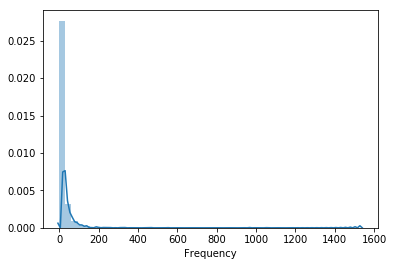

In [30]:
sns.distplot(datamart["Frequency"])
plt.show()

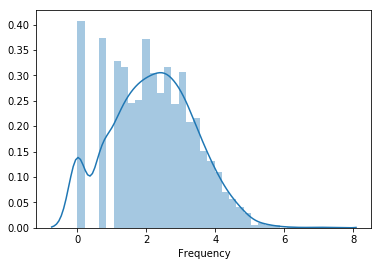

In [31]:
# Since both are highly skewed, we'll use logarithmic transformation 
# This transformation works on positive values only

frequency_log = np.log(datamart["Frequency"])

sns.distplot(frequency_log)
plt.show()


In [32]:
# Conclusion : The distribution of the frequency_log plot has very little skewness compared to the previous distribution

In [33]:
# Centering and scaling the dataset

#Creating the dataset datamart_rfm

datamart_rfm = datamart[["Recency", "Frequency", "Monetary"]]

In [34]:
datamart_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,2,27,992.82
12748,1,967,7522.06
12749,4,37,813.45
12820,3,17,268.02
12822,71,9,146.15


In [35]:
# Analyzing the Key statistics of the dataset
datamart_rfm.describe().round(2)

,Recency,Frequency,Monetary
count,3701.00,3701.00,3701.00
mean,94.30,19.15,380.54
std,99.97,44.83,1474.29
min,1.00,1.00,0.65
25%,19.00,4.00,59.40
50%,52.00,9.00,140.30
75%,151.00,21.00,337.80
max,374.00,1532.00,59596.07


In [36]:
# Conclusion : Huge variation between the Mean and Standard Deviation of the variables

In [37]:
# Scaling variables with different Variance

from sklearn .preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)

# StandardScaler outputs an n dimensional array

C:\Users\chandan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\chandan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [38]:
datamart_normalized

array([[-9.23341524e-01,  1.75184490e-01,  4.15365602e-01],
       [-9.33345380e-01,  2.11453640e+01,  4.84471143e+00],
       [-9.03333813e-01,  3.98271506e-01,  2.93683483e-01],
       ...,
       [-8.63318392e-01, -3.82533052e-01, -2.37323257e-01],
       [-9.03333813e-01,  2.96377219e+00,  3.55439942e-02],
       [-5.13183454e-01, -9.25199302e-02,  1.03283818e-02]])

In [39]:
pd.DataFrame(datamart_normalized).head()

,0,1,2
0,-0.923342,0.175184,0.415366
1,-0.933345,21.145364,4.844711
2,-0.903334,0.398272,0.293683
3,-0.913338,-0.047903,-0.076329
4,-0.233076,-0.226372,-0.159004


In [40]:
datamart_normalized.mean()

-7.359489742629156e-18

In [41]:
datamart_normalized.mean(axis=0).round(2)

array([-0.,  0.,  0.])

In [42]:
datamart_normalized.std().round(2)

1.0

In [43]:
datamart_normalized.std(axis=0)

array([1., 1., 1.])

In [44]:
datamart_normalized = pd.DataFrame(datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

In [45]:
datamart_normalized.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,-0.923342,0.175184,0.415366
12748,-0.933345,21.145364,4.844711
12749,-0.903334,0.398272,0.293683
12820,-0.913338,-0.047903,-0.076329
12822,-0.233076,-0.226372,-0.159004


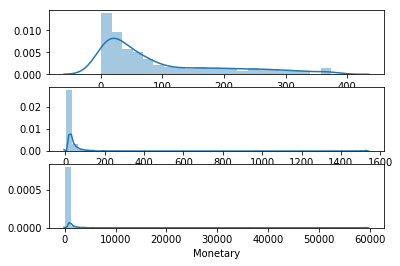

In [46]:
# Coding the Sequence : 1. Log transformation      2. Standardizing and Scaling

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_rfm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_rfm['Frequency'])

# Plot monetary value distribution
plt.subplot(3,1,3); sns.distplot(datamart_rfm["Monetary"])

# Show the plot
plt.show()

In [47]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)

In [48]:
datamart_normalized.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,-2.195642,0.909521,1.482882
12748,-2.684553,3.845050,3.022433
12749,-1.706731,1.168000,1.331390
12820,-1.909647,0.530005,0.487337
12822,0.322128,0.008268,0.026297


In [49]:
datamart_normalized.describe().round(2)

,Recency,Frequency,Monetary
count,3701.00,3701.00,3701.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.68,-1.79,-4.09
25%,-0.61,-0.66,-0.66
50%,0.10,0.01,-0.00
75%,0.85,0.70,0.66
max,1.49,4.22,4.60


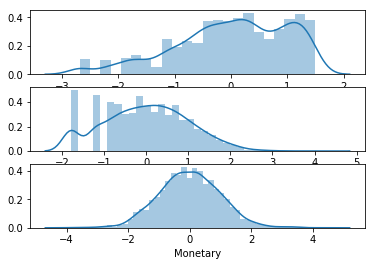

In [50]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(datamart_normalized['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(datamart_normalized['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(datamart_normalized['Monetary'])

# Show the plot
plt.show()

In [51]:
# Running k-means cluster (EXAMPLE)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 1)
kmeans.fit(datamart_normalized)
kmeans.transform(datamart_normalized)

array([[1.68248945, 3.818771  ],
       [4.27599271, 6.65826533],
       [1.22622213, 3.52094981],
       ...,
       [2.86023215, 1.93298942],
       [1.82875527, 4.04519791],
       [0.75448387, 1.89087172]])

In [52]:
cluster_labels = kmeans.labels_

In [53]:
# Create a new dataset from raw dataset, datamart_rfm, and assign a column Cluster
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels)

In [54]:
datamart_rfm_k2.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12747,2,27,992.82,0
12748,1,967,7522.06,0
12749,4,37,813.45,0
12820,3,17,268.02,0
12822,71,9,146.15,1


In [55]:
# Calculate the average RFM values for each cluster
datamart_rfm_k2.groupby("Cluster").agg({"Recency" : "mean",
                                        "Frequency" : "mean",
                                        "Monetary" : ["mean", "count"]}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          33.2      35.8    729.4  1676
1         144.9       5.3     91.8  2025

In [56]:
# Identifying "k", best suited as per the dataset

# Create an empty dictionary to store "sse"

sse = {}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(datamart_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

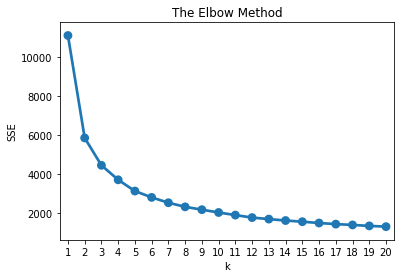

In [57]:
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [58]:
# As per the Elbow criterion method, "k" turns out to be 2, but for Experimentation purpose we will also evaluate results for k=3

# For k=2
kmeans = KMeans(n_clusters = 2, random_state = 1)
kmeans.fit(datamart_normalized)
kmeans.transform(datamart_normalized)

array([[1.68248945, 3.818771  ],
       [4.27599271, 6.65826533],
       [1.22622213, 3.52094981],
       ...,
       [2.86023215, 1.93298942],
       [1.82875527, 4.04519791],
       [0.75448387, 1.89087172]])

In [59]:
cluster_labels = kmeans.labels_
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels)
datamart_rfm_k2.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12747,2,27,992.82,0
12748,1,967,7522.06,0
12749,4,37,813.45,0
12820,3,17,268.02,0
12822,71,9,146.15,1


In [60]:
# Calculate the average RFM values for each cluster
datamart_rfm_k2.groupby("Cluster").agg({"Recency" : "mean",
                                        "Frequency" : "mean",
                                        "Monetary" : ["mean", "count"]}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          33.2      35.8    729.4  1676
1         144.9       5.3     91.8  2025

In [61]:
# Now, for k=3

kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(datamart_normalized)
kmeans.transform(datamart_normalized)

array([[2.75077354, 4.27389432, 1.08552114],
       [5.42668132, 7.16379489, 3.61267785],
       [2.37276584, 4.00179237, 0.54695523],
       ...,
       [2.32194801, 1.94882913, 3.29670866],
       [2.89163962, 4.52690547, 1.30432066],
       [0.69721858, 2.40319384, 1.41881467]])

In [62]:
datamart_normalized.head()

,Recency,Frequency,Monetary
CustomerID,,,
12747,-2.195642,0.909521,1.482882
12748,-2.684553,3.845050,3.022433
12749,-1.706731,1.168000,1.331390
12820,-1.909647,0.530005,0.487337
12822,0.322128,0.008268,0.026297


In [63]:
cluster_labels = kmeans.labels_
datamart_rfm_k3 = datamart_rfm.assign(Cluster = cluster_labels)

In [64]:
# Calculate the average RFM values for each cluster
datamart_rfm_k3.groupby("Cluster").agg({"Recency" : "mean",
                                        "Frequency" : "mean",
                                        "Monetary" : ["mean", "count"]}).round(1)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          78.4      13.6    232.0  1621
1         171.6       3.1     55.3  1225
2          13.8      52.7   1128.1   855

In [76]:
# Conclusion : While the 2 cluster segmentation is simpler, the 3 Cluster solution gives more insights
datamart_normalized.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12747,-2.195642,0.909521,1.482882,2
12748,-2.684553,3.845050,3.022433,2
12749,-1.706731,1.168000,1.331390,2
12820,-1.909647,0.530005,0.487337,2
12822,0.322128,0.008268,0.026297,0


In [84]:
#Profile and Interpret segments:

#Method 1
#Snake plot to understand and compare results

#Transform datamart_normalized as DataFrame and add a Cluster column
datamart_normalized = pd.DataFrame(datamart_normalized, 
                                   index=datamart_rfm.index, 
                                   columns=datamart_rfm.columns)
datamart_normalized['Cluster'] = datamart_rfm_k3['Cluster']


In [67]:
# Melt the data into a long format so RFM values and metric names are stored in 1 column each

datamart_melt = pd.melt(datamart_normalized.reset_index(), 
                    id_vars=['CustomerID', 'Cluster'],
                    value_vars=['Recency', 'Frequency', 'Monetary'], 
                    var_name='Attribute', 
                    value_name='Value')

In [68]:
datamart_melt.head()

,CustomerID,Cluster,Attribute,Value
0,12747,2,Recency,-2.195642
1,12748,2,Recency,-2.684553
2,12749,2,Recency,-1.706731
3,12820,2,Recency,-1.909647
4,12822,0,Recency,0.322128


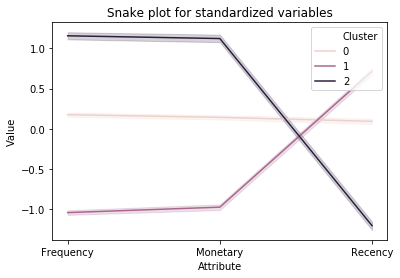

In [69]:
plt.title("Snake plot for standardized variables")
sns.lineplot(data = datamart_melt, x = "Attribute", y = "Value", hue = "Cluster")
plt.show()

In [70]:
# Method 2 - Relative importance of segment attributes

#Useful technique to identify relative importance of each segment's attribute
#Calculate average values of each cluster
#Calculate average values of population

cluster_avg = datamart_rfm_k3.groupby("Cluster").mean().round(2)
cluster_avg

,Recency,Frequency,Monetary
Cluster,,,
0,78.35,13.58,232.04
1,171.58,3.12,55.29
2,13.81,52.67,1128.05


In [71]:
population_avg = datamart_rfm.mean()     # or datamart_rfm_k3.mean()
population_avg

Recency       94.298568
Frequency     19.147257
Monetary     380.535069
dtype: float64

In [72]:
relative_imp = cluster_avg/population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,-0.17,-0.29,-0.39
1,0.82,-0.84,-0.85
2,-0.85,1.75,1.96


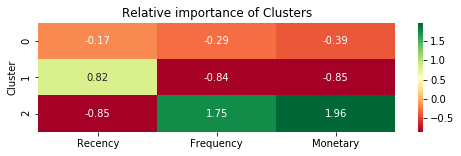

In [73]:
# Plotting heat map for relative importance

plt.figure(figsize=(8, 2))
plt.title("Relative importance of Clusters")
sns.heatmap(data = relative_imp, annot = True, fmt = ".2f", cmap = "RdYlGn")
plt.show()

In [74]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSum
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,12.60
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,1.45
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,22.50
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2.10
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,17.85
